## Load the CDF 

In [1]:
packageVersion("hgu133plus2hsentrezgcdf")
library(affy)

[1] ‘24.0.0’

Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min

Loading required package: Biobase
Welcome to Bioconductor

    Vignettes contain introductory material; view with


In [2]:
help(ReadAffy)

## Read in Gene Expression CEL files

In [3]:
CELs.entrezgene = ReadAffy(cdfname="hgu133plus2hsentrezgcdf",
                           filenames=c('/data/CELS/GSM1154244_2Problema.CEL',
                                       '/data/CELS/GSM1154245_2Problema_2.CEL',
                                       '/data/CELS/GSM1154246_2Problema_3.CEL',
                                       '/data/CELS/GSM1154247_1Control.CEL', 
                                       '/data/CELS/GSM1154248_1Control_2.CEL',
                                       '/data/CELS/GSM1154249_1Control_3.CEL'))

eset.entrezgene = rma(CELs.entrezgene)
rma.exprs <- exprs(eset.entrezgene)

Loading required package: AnnotationDbi
Loading required package: stats4
Loading required package: IRanges
Loading required package: S4Vectors

Attaching package: ‘S4Vectors’

The following object is masked from ‘package:base’:

    expand.grid




Background correcting
Normalizing
Calculating Expression


## Perform Differential Expression

In [4]:
library(multtest)

groups=c(1, 1, 1, 0, 0, 0)
stats=mt.teststat(rma.exprs, groups, test="t")
rawp=2*(1-pnorm(abs(stats)))

# Permutation adjusted p-values for simple multiple testing procedures
procs<-c("Bonferroni","BH")
res2<-mt.rawp2adjp(rawp, procs)

# Plot results from all multiple testing procedures
allp <- cbind(res2$adjp[order(res2$index),])


adjp=p.adjust(rawp, method="bonferroni")

# arraysRMAstats=cbind(rma.exprs[-1,0], adjp)

# output = cbind(rma.exprs[-1, 0], rawp, adjp, stats)
# trunc_output= head(output, n=100)

## Plots 

#### P-value vs. test-statistic

In [18]:
help(mt.plot)

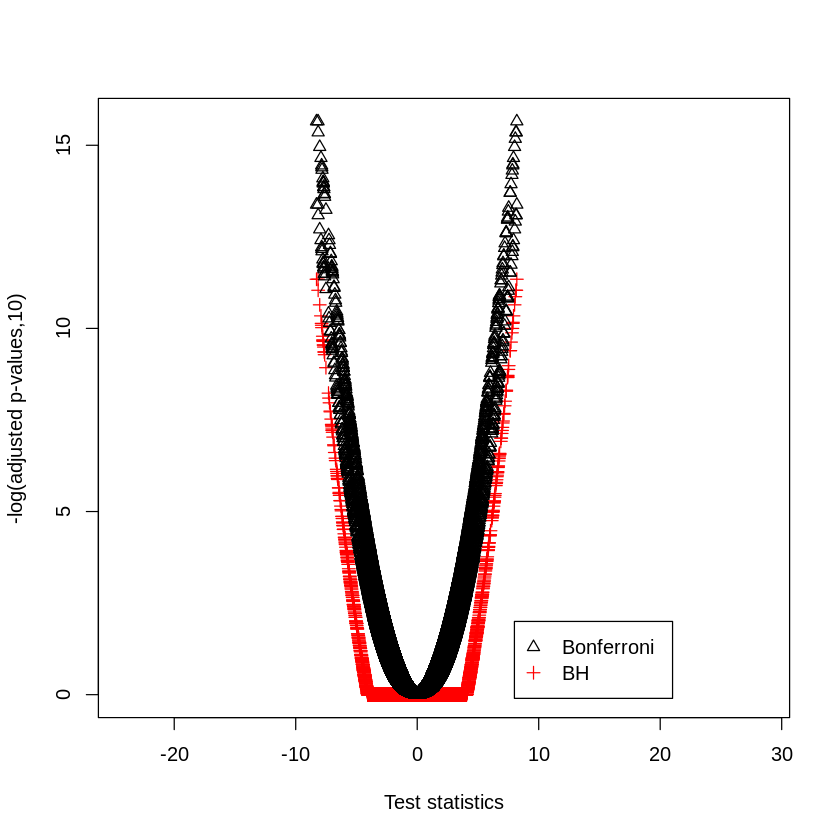

In [6]:
cols<-c(1,2)
ltypes<-c(2:3) 
mt.plot(allp, stats, plottype="pvst", logscale=TRUE,
        proc=procs, leg=c(8,2), pch=ltypes, col=cols)

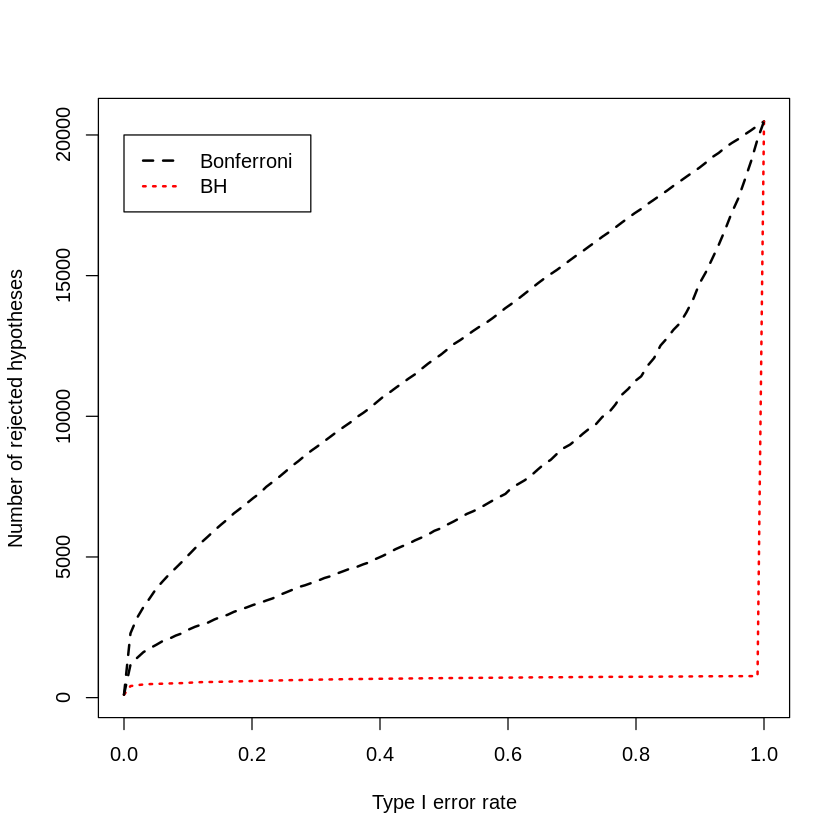

In [22]:
mt.plot(allp, teststat, plottype="rvsa", proc=procs, leg=c(0,20000),
        lty=ltypes, col=cols, lwd=2)

In [30]:
sum(adjp < 0.05)

[1] 489